# Problem Set 3


## BDAT 1004 DATA PROGRAMMING 

### SCARIA  OUSEPH KURIAN
### ID : 200500042 

# Question 1


### Step 1 : Import the neccessary libraries.

In [53]:
import pandas as pd

### Step 2 : Import the dataset from this address.
### Step 3 : Assign it to a variable called users.

In [54]:
users = pd.read_csv('https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user',sep='|') 

### Step 4 : Discover what is the mean age per occupation.

In [55]:
#https://www.geeksforgeeks.org/pandas-groupby/
users['age'].groupby(users['occupation']).mean()

occupation
administrator    38.746835
artist           31.392857
doctor           43.571429
educator         42.010526
engineer         36.388060
entertainment    29.222222
executive        38.718750
healthcare       41.562500
homemaker        32.571429
lawyer           36.750000
librarian        40.000000
marketing        37.615385
none             26.555556
other            34.523810
programmer       33.121212
retired          63.071429
salesman         35.666667
scientist        35.548387
student          22.081633
technician       33.148148
writer           36.311111
Name: age, dtype: float64

### Step 5 : Discover the male ratio per occupation and sort it from the most to the least.

In [56]:
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.pivot_table.html
maleRatio = pd.pivot_table(users, aggfunc = 'count', values = 'age', index = 'occupation', columns = 'gender', fill_value = 0)
maleRatio

gender,F,M
occupation,,
administrator,36,43
artist,13,15
doctor,0,7
educator,26,69
engineer,2,65
entertainment,2,16
executive,3,29
healthcare,11,5
homemaker,6,1


In [57]:
#https://stackoverflow.com/questions/40200070/what-does-axis-0-do-in-numpys-sum-function
total = maleRatio[['F','M']].sum(axis = 1)
total

occupation
administrator     79
artist            28
doctor             7
educator          95
engineer          67
entertainment     18
executive         32
healthcare        16
homemaker          7
lawyer            12
librarian         51
marketing         26
none               9
other            105
programmer        66
retired           14
salesman          12
scientist         31
student          196
technician        27
writer            45
dtype: int64

In [58]:
maleRatio['maleRatio'] = (maleRatio['M']/total)
maleRatio.sort_values(by = ['maleRatio'], ascending = False)

gender,F,M,maleRatio
occupation,,,
doctor,0,7,1.000000
engineer,2,65,0.970149
technician,1,26,0.962963
retired,1,13,0.928571
programmer,6,60,0.909091
executive,3,29,0.906250
scientist,3,28,0.903226
entertainment,2,16,0.888889
lawyer,2,10,0.833333


### Step 6 : For each occupation, calculate the minimum and maximum ages.

In [59]:
users['age'].groupby(users['occupation']).min()

occupation
administrator    21
artist           19
doctor           28
educator         23
engineer         22
entertainment    15
executive        22
healthcare       22
homemaker        20
lawyer           21
librarian        23
marketing        24
none             11
other            13
programmer       20
retired          51
salesman         18
scientist        23
student           7
technician       21
writer           18
Name: age, dtype: int64

In [60]:
users['age'].groupby(users['occupation']).max()

occupation
administrator    70
artist           48
doctor           64
educator         63
engineer         70
entertainment    50
executive        69
healthcare       62
homemaker        50
lawyer           53
librarian        69
marketing        55
none             55
other            64
programmer       63
retired          73
salesman         66
scientist        55
student          42
technician       55
writer           60
Name: age, dtype: int64

### Step 7 : For each combination of occupation and sex, calculate the mean age.

In [61]:
#https://www.w3schools.com/python/ref_func_round.asp implementing the round value function.
round(users.groupby(['occupation', 'gender'])['age'].mean(), 0)

occupation     gender
administrator  F         41.0
               M         37.0
artist         F         30.0
               M         32.0
doctor         M         44.0
educator       F         39.0
               M         43.0
engineer       F         30.0
               M         37.0
entertainment  F         31.0
               M         29.0
executive      F         44.0
               M         38.0
healthcare     F         40.0
               M         45.0
homemaker      F         34.0
               M         23.0
lawyer         F         40.0
               M         36.0
librarian      F         40.0
               M         40.0
marketing      F         37.0
               M         38.0
none           F         36.0
               M         19.0
other          F         35.0
               M         34.0
programmer     F         32.0
               M         33.0
retired        F         70.0
               M         63.0
salesman       F         27.0
               M  

### Step 8 : For each occupation present the percentage of women and men.

In [62]:
users_Male=users[users['gender']=='M']
users_Female=users[users['gender']=='F']

In [63]:
users_Male

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
2,3,23,M,writer,32067
3,4,24,M,technician,43537
5,6,42,M,executive,98101
6,7,57,M,administrator,91344
...,...,...,...,...,...
935,936,24,M,other,32789
936,937,48,M,educator,98072
939,940,32,M,administrator,02215
940,941,20,M,student,97229


In [64]:
users_Female

,user_id,age,gender,occupation,zip_code
1,2,53,F,other,94043
4,5,33,F,other,15213
10,11,39,F,other,30329
11,12,28,F,other,06405
14,15,49,F,educator,97301
...,...,...,...,...,...
924,925,18,F,salesman,49036
929,930,28,F,scientist,07310
937,938,38,F,technician,55038
938,939,26,F,student,33319


In [65]:
male_per_occ = users_Male.groupby('occupation')[['gender']].count()
female_per_occ = users_Female.groupby('occupation')[['gender']].count()

In [66]:
male_per_occ

,gender
occupation,
administrator,43
artist,15
doctor,7
educator,69
engineer,65
entertainment,16
executive,29
healthcare,5
homemaker,1


In [67]:
female_per_occ

,gender
occupation,
administrator,36
artist,13
educator,26
engineer,2
entertainment,2
executive,3
healthcare,11
homemaker,6
lawyer,2


In [68]:
#https://stackoverflow.com/questions/5997987/is-there-an-operator-to-calculate-percentage-in-python/5998010
maleRatio = pd.pivot_table(users, aggfunc = 'count', values = 'age', index = 'occupation', columns = 'gender', fill_value = 0)
maleRatio['male %'] = (maleRatio['M']/total)*100
maleRatio['female %'] = (1 - (maleRatio['M']/total))*100
maleRatio.round(decimals = 1).drop(columns= ['M','F'], axis = 0)

gender,male %,female %
occupation,,
administrator,54.4,45.6
artist,53.6,46.4
doctor,100.0,0.0
educator,72.6,27.4
engineer,97.0,3.0
entertainment,88.9,11.1
executive,90.6,9.4
healthcare,31.2,68.8
homemaker,14.3,85.7


# Question 2

## Euro Teams
### Step 1 : Import the neccessary libraries.

In [2]:
import pandas as pd

### Step 2 : Import the dataset form this address
### Step 3 : Assign it to a variable called euro12

In [3]:
euro12 = pd.read_csv('https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv',sep=',')

### Step 4 : Select only the goal column.

In [4]:
euro12.Goals

0      4
1      4
2      4
3      5
4      3
5     10
6      5
7      6
8      2
9      2
10     6
11     1
12     5
13    12
14     5
15     2
Name: Goals, dtype: int64

### Step 5 : How many team participated in the euro2021.

In [5]:
#https://www.w3schools.com/python/ref_list_count.asp
euro12.Team.count()

16

### Step 6 : What is the number of columns in the dataset?

In [6]:
#https://note.nkmk.me/en/python-pandas-len-shape-size/
euro12.shape[1]

35

### Step 7 : View only the columns Team, Yellow Cards and Red Cards and assign them to a dataframe called discipline.

In [7]:
#https://stackoverflow.com/questions/20297332/how-do-i-retrieve-the-number-of-columns-in-a-pandas-data-frame
column_name=['Team','Yellow Cards','Red Cards']
discipline=pd.DataFrame(euro12,columns=column_name)

In [8]:
discipline

,Team,Yellow Cards,Red Cards
0,Croatia,9,0
1,Czech Republic,7,0
2,Denmark,4,0
3,England,5,0
4,France,6,0
5,Germany,4,0
6,Greece,9,1
7,Italy,16,0
8,Netherlands,5,0
9,Poland,7,1


### Step 8 : Sort the teams by Red Cards, then to Yellow Cards.

In [9]:
#https://www.geeksforgeeks.org/python-pandas-dataframe-sort_values-set-1/
discipline.sort_values(by='Red Cards', ascending=False)

,Team,Yellow Cards,Red Cards
6,Greece,9,1
9,Poland,7,1
11,Republic of Ireland,6,1
0,Croatia,9,0
1,Czech Republic,7,0
2,Denmark,4,0
3,England,5,0
4,France,6,0
5,Germany,4,0
7,Italy,16,0


In [10]:
discipline.sort_values(by='Yellow Cards', ascending=False)

,Team,Yellow Cards,Red Cards
7,Italy,16,0
10,Portugal,12,0
13,Spain,11,0
0,Croatia,9,0
6,Greece,9,1
1,Czech Republic,7,0
9,Poland,7,1
14,Sweden,7,0
4,France,6,0
11,Republic of Ireland,6,1


### Step 9 :  Calculate the mean Yellow Cards given per Team.


In [11]:
euro12['Yellow Cards'].groupby(euro12['Team']).mean()

Team
Croatia                 9
Czech Republic          7
Denmark                 4
England                 5
France                  6
Germany                 4
Greece                  9
Italy                  16
Netherlands             5
Poland                  7
Portugal               12
Republic of Ireland     6
Russia                  6
Spain                  11
Sweden                  7
Ukraine                 5
Name: Yellow Cards, dtype: int64

### Step 10 : Filter teams that scored more than 6 goals.


In [13]:
euro12[euro12['Goals']>6]['Team']

5     Germany
13      Spain
Name: Team, dtype: object

### Step 11 :  Select the teams that start with G.

In [17]:
#https://pandas.pydata.org/docs/reference/api/pandas.Series.str.startswith.html
euro12[euro12['Team'].str.startswith ('G')]['Team']

5    Germany
6     Greece
Name: Team, dtype: object

### Step 12. Select the first 7 columns.

In [18]:
euro12.head(7)

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,13,81.3%,41,62,2,9,0,9,9,16
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,9,60.1%,53,73,8,7,0,11,11,19
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,10,66.7%,25,38,8,4,0,7,7,15
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,22,88.1%,43,45,6,5,0,11,11,16
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,6,54.6%,36,51,5,6,0,11,11,19
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,13,65.1%,67,48,12,9,1,12,12,20


### Step 13. Select all columns except the last 3.

In [20]:
#https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.iloc.html
euro12.iloc[:,:-3]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Clean Sheets,Blocks,Goals conceded,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,0,10,3,13,81.3%,41,62,2,9,0
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,1,10,6,9,60.1%,53,73,8,7,0
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,1,10,5,10,66.7%,25,38,8,4,0
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,2,29,3,22,88.1%,43,45,6,5,0
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,1,7,5,6,54.6%,36,51,5,6,0
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,1,11,6,10,62.6%,63,49,12,4,0
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,1,23,7,13,65.1%,67,48,12,9,1
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,...,2,18,7,20,74.1%,101,89,16,16,0
8,Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,...,0,9,5,12,70.6%,35,30,3,5,0
9,Poland,2,15,23,39.4%,5.2%,48,0,0,0,...,0,8,3,6,66.7%,48,56,3,7,1


### Step 14 :  Present only the Shooting Accuracy from England, Italy and Russia.

In [32]:
#https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.isin.html
euro12[euro12.Team.isin(['England', 'Italy', 'Russia'])][['Team','Shooting Accuracy']]

,Team,Shooting Accuracy
3,England,50.0%
7,Italy,43.0%
12,Russia,22.5%


# Question 3

### Step 1. Import the necessary libraries.


In [9]:
import pandas as pd 
import random

### Step 2. Create 3 differents Series, each of length 100, as follows:
• The first a random number from 1 to 4<br>
• The second a random number from 1 to 3<br>
• The third a random number from 10,000 to 30,000


In [10]:
#https://www.w3schools.com/python/ref_random_randint.asp
first = [[random.randint(1, 4)] for i in range(100)]
second = [[random.randint(1, 3)] for i in range(100)]
third = [[random.randint(10000, 30000)] for i in range(100)]

In [11]:
#https://www.geeksforgeeks.org/python-pandas-dataframe/
df1 = pd.DataFrame(first)
df2 = pd.DataFrame(second)
df3 = pd.DataFrame(third)


In [12]:
df1

,0
0,1
1,3
2,4
3,3
4,3
...,...
95,2
96,3
97,4
98,3


In [13]:
df2

,0
0,3
1,3
2,1
3,1
4,2
...,...
95,1
96,3
97,3
98,1


In [14]:
df3

,0
0,22101
1,10320
2,27933
3,22001
4,13487
...,...
95,11912
96,17175
97,28926
98,25036


### Step 3. Create a DataFrame by joinning the Series by column.

In [15]:
#https://pandas.pydata.org/docs/reference/api/pandas.concat.html
df = pd.concat([df1, df2 , df3], axis=1)
df

,0,0,0
0,1,3,22101
1,3,3,10320
2,4,1,27933
3,3,1,22001
4,3,2,13487
...,...,...,...
95,2,1,11912
96,3,3,17175
97,4,3,28926
98,3,1,25036


### Step 4. Change the name of the columns to bedrs, bathrs, price_sqr_meter.

In [16]:
#https://www.dataindependent.com/pandas/pandas-change-column-names/
df.columns = ['bedrs', 'bathrs', 'price_sqr_meter']
df

,bedrs,bathrs,price_sqr_meter
0,1,3,22101
1,3,3,10320
2,4,1,27933
3,3,1,22001
4,3,2,13487
...,...,...,...
95,2,1,11912
96,3,3,17175
97,4,3,28926
98,3,1,25036


### Step 5. Create a one column DataFrame with the values of the 3 Series and assign it to 'bigcolumn'.


In [17]:
#https://www.geeksforgeeks.org/python-pandas-dataframe-astype/
#https://pandas.pydata.org/docs/reference/api/pandas.Series.str.cat.html
df_new = df.bedrs.astype(str).str.cat(df.bathrs.astype(str)).str.cat(df.price_sqr_meter.astype(str))
df_new.columns = ['bigcolumn']
df_new

0     1322101
1     3310320
2     4127933
3     3122001
4     3213487
       ...   
95    2111912
96    3317175
97    4328926
98    3125036
99    4128823
Name: bedrs, Length: 100, dtype: object

### Step 6. Ops it seems it is going only until index 99. Is it true?


Yes, it is clear from above that index range it is upto 99.

### Step 7. Reindex the DataFrame so it goes from 0 to 299.

In [18]:
#https://pandas.pydata.org/docs/reference/api/pandas.RangeIndex.html
df_new.index = pd.RangeIndex(start=0, stop=300)
df_new.reset_index()

ValueError: Length mismatch: Expected axis has 100 elements, new values have 300 elements

# Question 4

### Step 1. Import the necessary libraries.

In [23]:
import pandas as pd 
import numpy as np

### Step 2. Import the dataset from the attached file wind.txt.


In [24]:
#https://www.geeksforgeeks.org/python-string-split/
Wind = pd.read_csv('wind.txt',sep='\s+')
Wind

,Yr,Mo,Dy,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,61,1,1,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,61,1,2,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,61,1,3,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,61,1,4,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,61,1,5,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6569,78,12,27,17.58,16.96,17.62,8.08,13.21,11.67,14.46,15.59,14.04,14.00,17.21,40.08
6570,78,12,28,13.21,5.46,13.46,5.00,8.12,9.42,14.33,16.25,15.25,18.05,21.79,41.46
6571,78,12,29,14.00,10.29,14.42,8.71,9.71,10.54,19.17,12.46,14.50,16.42,18.88,29.58
6572,78,12,30,18.50,14.04,21.29,9.13,12.75,9.71,18.08,12.87,12.46,12.12,14.67,28.79


### Step 3. Assign it to a variable called data and replace the first 3 columns by a proper datetime index.

In [25]:
data = pd.read_csv('wind.txt',sep='\s+')
data = Wind
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html
data["Date"] = pd.to_datetime(data[["Yr","Mo","Dy"]].astype(str).agg('-'.join, axis=1))
#https://stackoverflow.com/questions/13411544/delete-a-column-from-a-pandas-dataframe
data = data.drop(columns=["Yr","Mo","Dy"])
data = data[['Date','RPT','VAL','ROS','KIL','SHA','BIR','DUB','CLA','MUL','CLO','BEL','MAL']]
data.head()

,Date,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,2061-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,2061-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,2061-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,2061-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,2061-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83


### Step 4. Year 2061? Do we really have data from this year? Create a function to fix it and apply it.

In [26]:
#https://stackoverflow.com/questions/38579532/pandas-equivalent-of-np-where
data["Date"] = np.where(pd.DatetimeIndex(data["Date"]).year < 2000, data.Date,data.Date - pd.offsets.DateOffset(years=100))
data.head()

,Date,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,1961-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,1961-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,1961-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,1961-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,1961-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83


### Step 5. Set the right dates as the index. Pay attention at the data type, it should be datetime64[ns].

In [27]:
#https://www.geeksforgeeks.org/python-pandas-dataframe-set_index/
data = data.set_index('Date')
data

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Date,,,,,,,,,,,,
1961-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1961-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
1961-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
1961-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
1961-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83
...,...,...,...,...,...,...,...,...,...,...,...,...
1978-12-27,17.58,16.96,17.62,8.08,13.21,11.67,14.46,15.59,14.04,14.00,17.21,40.08
1978-12-28,13.21,5.46,13.46,5.00,8.12,9.42,14.33,16.25,15.25,18.05,21.79,41.46
1978-12-29,14.00,10.29,14.42,8.71,9.71,10.54,19.17,12.46,14.50,16.42,18.88,29.58


### Step 6. Compute how many values are missing for each location over the entire record.They should be ignored in all calculations below.

In [28]:
#https://www.geeksforgeeks.org/python-pandas-dataframe-isna/
data.isna().sum()

RPT    6
VAL    3
ROS    2
KIL    5
SHA    2
BIR    0
DUB    3
CLA    2
MUL    3
CLO    1
BEL    0
MAL    4
dtype: int64

### Step 7. Compute how many non-missing values there are in total.

In [29]:
#https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html
#https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.notna.html
data = data.dropna()
data.notna().sum().sum()

78552

### Step 8. Calculate the mean windspeeds of the windspeeds over all the locations and all the times.

In [30]:
avg_wind_speed = data.mean().mean()
avg_wind_speed

10.222465245951712

### Step 9. Create a DataFrame called loc_stats and calculate the min, max and mean windspeeds and standard deviations of the windspeeds at each location over all the days. A different set of numbers for each location.

In [31]:
loc_stats = data.describe()
loc_stats.loc[['mean','std','min','max'],:]

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
mean,12.359979,10.640267,11.656396,6.298587,10.448923,7.085066,9.793006,8.486601,8.490257,8.696705,13.110668,15.603129
std,5.618805,5.268695,5.007805,3.600942,4.933988,3.967735,4.978030,4.498299,4.165947,4.500488,5.829054,6.702178
min,0.670000,0.210000,1.500000,0.000000,0.130000,0.000000,0.000000,0.000000,0.000000,0.040000,0.130000,0.670000
max,35.800000,33.370000,33.840000,28.460000,37.540000,26.160000,30.370000,31.080000,25.880000,28.210000,42.380000,42.540000


### Step 10. Create a DataFrame called day_stats and calculate the min, max and mean windspeed and standard deviations of the windspeeds across all the locations at each day. A different set of numbers for each day.

In [32]:
day_stats = pd.DataFrame()

day_stats['min'] = data.min(axis=1)
day_stats['max'] = data.max(axis=1)
day_stats['mean'] = data.mean(axis=1)
day_stats['std'] = data.std(axis=1)

day_stats

,min,max,mean,std
Date,,,,
1961-01-04,1.79,11.75,6.619167,3.198126
1961-01-05,6.17,13.33,10.630000,2.445356
1961-01-06,4.42,13.21,8.240000,2.998063
1961-01-07,4.96,14.29,10.385000,3.072114
1961-01-08,5.91,16.62,10.487500,3.547237
...,...,...,...,...
1978-12-27,8.08,40.08,16.708333,7.868076
1978-12-28,5.00,41.46,15.150000,9.687857
1978-12-29,8.71,29.58,14.890000,5.756836


### Step 11. Find the average windspeed in January for each location. Treat January 1961 and January 1962 both as January.

In [33]:
data.loc[data.index.month == 1].mean()

RPT    14.831609
VAL    12.885389
ROS    13.276275
KIL     7.152477
SHA    11.644467
BIR     8.030561
DUB    11.788336
CLA     9.486962
MUL     9.511501
CLO    10.024069
BEL    14.527848
MAL    18.041826
dtype: float64

### Step 12. Downsample the record to a yearly frequency for each location.

In [34]:
#https://www.geeksforgeeks.org/python-pandas-dataframe-resample/
freq_yearly = data.resample('Y').mean()
freq_yearly.index = freq_yearly.index.to_period('Y')
freq_yearly

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Date,,,,,,,,,,,,
1961,12.207588,10.207206,11.282853,6.846441,10.742735,7.617147,9.633265,8.684912,8.571941,9.700471,13.271559,13.587206
1962,12.274779,10.150856,11.714365,6.964337,10.692265,7.415331,11.043122,8.829807,8.335552,9.693812,12.985691,14.361436
1963,12.813452,10.836986,12.541151,7.330055,11.724110,8.434712,11.075699,10.336548,8.903589,10.224438,13.638877,14.999014
1964,12.363661,10.920164,12.104372,6.787787,11.454481,7.570874,10.259153,9.467350,7.789016,10.207951,13.740546,14.910301
1965,12.451370,11.075534,11.848767,6.858466,11.024795,7.478110,10.618712,8.879918,7.907425,9.918082,12.964247,15.591644
1966,13.461973,11.557205,12.020630,7.345726,11.805041,7.793671,10.579808,8.835096,8.514438,9.768959,14.265836,16.307260
1967,12.737151,10.990986,11.739397,7.143425,11.630740,7.368164,10.652027,9.325616,8.645014,9.547425,14.774548,17.135945
1968,11.835628,10.468197,11.409754,6.477678,10.760765,6.067322,8.859180,8.255519,7.224945,7.832978,12.808634,15.017486
1969,11.166356,9.723699,10.902000,5.767973,9.873918,6.189973,8.564493,7.711397,7.924521,7.754384,12.621233,15.762904


### Step 13. Downsample the record to a monthly frequency for each location.

In [35]:
freq_monthly = data.resample('M').mean()
freq_monthly.index = freq_monthly.index.to_period('M')
freq_monthly

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Date,,,,,,,,,,,,
1961-01,14.506154,11.225385,12.960385,6.840000,10.509231,8.174231,10.403077,8.670769,8.323462,9.490385,13.270000,14.341538
1961-02,16.401923,15.037308,14.470000,9.242692,13.778077,10.884615,11.868077,11.746154,11.748462,12.626538,18.165000,15.300769
1961-03,10.660000,11.097407,10.420000,7.100741,10.265556,8.580000,9.108519,9.329259,10.100000,10.989630,16.066296,15.418889
1961-04,10.722667,9.427667,9.998000,5.830667,8.435000,6.495000,6.925333,7.094667,7.342333,7.237000,11.147333,10.278333
1961-05,10.024643,8.495714,10.539286,5.992500,9.480357,6.633929,7.645714,8.206786,8.120714,8.534643,11.912143,11.911786
...,...,...,...,...,...,...,...,...,...,...,...,...
1978-08,9.645161,8.259355,9.032258,4.502903,7.368065,5.935161,5.650323,5.417742,7.241290,5.536774,10.466774,12.054194
1978-09,10.913667,10.895000,10.635000,5.725000,10.372000,9.278333,10.790333,9.583000,10.069333,8.939000,15.680333,19.391333
1978-10,9.897742,8.670968,9.295806,4.721290,8.525161,6.774194,8.115484,7.337742,8.297742,8.243871,13.776774,17.150000


### Step 14. Downsample the record to a weekly frequency for each location.

In [36]:
freq_weekly = data.resample('W').mean()
freq_weekly.index = freq_weekly.index.to_period('W')
freq_weekly

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Date,,,,,,,,,,,,
1961-01-02/1961-01-08,12.316000,10.408000,10.050000,5.658000,8.506000,6.242000,10.936000,5.932000,8.150000,8.428000,11.416000,13.226000
1961-01-09/1961-01-15,12.468571,8.967143,11.958571,4.630000,7.351429,5.072857,7.535714,6.820000,5.712857,7.571429,11.125714,11.024286
1961-01-16/1961-01-22,12.100000,9.500000,11.681667,4.293333,8.966667,6.938333,7.828333,7.291667,5.891667,6.693333,9.993333,10.346667
1961-01-23/1961-01-29,19.880000,14.846667,17.548333,11.916667,16.325000,14.016667,14.450000,14.311667,13.316667,14.921667,19.800000,22.388333
1961-01-30/1961-02-05,16.827143,15.460000,12.618571,8.247143,13.361429,9.107143,12.204286,8.548571,9.821429,9.460000,14.012857,11.935714
...,...,...,...,...,...,...,...,...,...,...,...,...
1978-11-27/1978-12-03,14.934286,11.232857,13.941429,5.565714,10.215714,8.618571,9.642857,7.685714,9.011429,9.547143,11.835714,18.728571
1978-12-04/1978-12-10,20.740000,19.190000,17.034286,9.777143,15.287143,12.774286,14.437143,12.488571,13.870000,14.082857,18.517143,23.061429
1978-12-11/1978-12-17,16.758571,14.692857,14.987143,6.917143,11.397143,7.272857,10.208571,7.967143,9.168571,8.565714,11.102857,15.562857


### Step 15. Calculate the min, max and mean windspeeds and standard deviations of the windspeeds across all locations for each week (assume that the first week starts on January 2 1961) for the first 52 weeks.

In [37]:
week_data = data.resample('W').agg(['min','max','mean','std'])
week_data.loc[week_data.index[1:53], : ]

RPT                                VAL                    \
              min    max       mean       std    min    max       mean   
Date                                                                     
1961-01-15   9.04  19.75  12.468571  3.555392   3.54  12.08   8.967143   
1961-01-22   4.92  17.75  12.100000  4.893064   3.42  14.37   9.500000   
1961-01-29  13.62  25.04  19.880000  4.619061   9.96  20.79  14.846667   
1961-02-05  10.58  24.21  16.827143  5.251408   9.46  24.21  15.460000   
1961-02-12  16.00  24.54  19.684286  3.587677  11.54  21.42  16.417143   
1961-02-19   6.04  22.50  14.956667  5.525210  11.63  20.17  15.008333   
1961-02-26   7.79  25.80  15.221429  7.020716   7.08  21.50  13.625714   
1961-03-05  10.96  13.33  11.824000  1.071742   8.83  17.00  12.956000   
1961-03-12   4.88  14.79   9.376667  3.732263   8.08  16.96  11.195000   
1961-03-19   4.92  16.88  11.911429  3.860036   9.46  15.54  13.501429   
1961-03-26   6.29  15.00   9.567143  3.613298   2.58  11.63   8.387143   
1961-04-02   5.88  18.25   9.818000  4.853908   3.50  16.29   7.684000   
1961-04-09   4.50  18.12  11.964286  4.604392   7.04  14.62  10.654286   
1961-04-16   4.71  15.50   8.965714  3.937727   4.83  12.25   8.000000   
1961-04-23   4.00  21.09  12.621429  5.676655   3.71  15.41  10.438571   
1961-04-30   4.08  16.29  10.117143  4.349662   6.50  14.46   9.798571   
1961-05-07   9.87  23.00  15.367143  5.025507  10.29  19.79  13.970000   
1961-05-14   3.54  12.79   7.901667  3.673850   3.96  11.54   7.645000   
1961-05-21   4.88  15.04   8.561667  3.857369   3.58  10.17   5.631667   
1961-05-28   4.96  10.92   7.550000  2.433828   3.67  11.17   6.536667   
1961-06-04   7.00  15.92  10.321429  3.099701   4.75   9.79   7.407143   
1961-06-11   8.29  14.42  10.917143  2.248597   6.83  11.54   8.992857   
1961-06-18   6.13  14.33  10.571429  3.009482   4.12  14.54   9.565714   
1961-06-25   4.00   9.00   7.345714  1.982035   3.25   9.50   6.108571   
1961-07-02   7.21  13.13   9.826000  2.629340   6.34  11.42   8.310000   
1961-07-09   7.29  17.50  11.806667  4.005984   3.75  10.75   7.221667   
1961-07-16   8.63  22.50  16.680000  5.168710   7.87  19.29  13.518571   
1961-07-23   3.04   5.88   4.202857  1.047978   2.92   6.79   4.255714   
1961-07-30   6.13  16.08  10.561429  4.157641   4.63  13.79   8.445714   
1961-08-06   7.67  16.08  10.870000  2.950887   5.09  15.79   8.792857   
1961-08-13   2.88  14.21   9.928000  4.931346   4.42  10.00   8.026000   
1961-08-20  13.13  18.91  15.471667  2.470590   7.25  13.62  10.513333   
1961-08-27   7.67  18.16  12.391429  3.395857   6.87  14.58  11.430000   
1961-09-03   3.63  14.46   8.678571  4.398615   1.13  22.00   8.821429   
1961-09-10   5.00  17.62  10.541429  5.207278   3.04  13.59   8.798571   
1961-09-17   5.33  28.75  17.160000  7.679190   7.12  22.08  14.440000   
1961-09-24   6.92  10.25   8.291667  1.250191   2.92  13.62   7.645000   
1961-10-01  10.34  19.12  14.850000  3.600911   6.96  13.62  11.361667   
1961-10-08   3.13  16.08  11.250000  5.596710   3.63  16.96   8.757143   
1961-10-15   3.71  17.12  10.881667  4.780675   6.13  13.25   9.905000   
1961-10-22  10.46  28.62  19.260000  7.888314   3.75  19.46  13.364286   
1961-10-29   4.33  21.34  14.353333  7.143390   2.75  17.00  10.303333   
1961-11-05   5.88  15.79  11.571429  3.369201   3.96  13.46   9.590000   
1961-11-12   5.46  16.08  10.428571  3.939811   5.50  10.75   7.690000   
1961-11-19   7.50  15.00  10.798571  2.784358   4.21  13.00   7.951429   
1961-11-26   5.75  14.29   9.638333  3.229622   3.29  11.79   6.886667   
1961-12-03   7.92  23.75  12.608571  5.704669   4.67  18.71  10.442857   
1961-12-10  10.83  23.71  17.362857  4.890152   9.21  21.37  14.362857   
1961-12-17   9.29  21.34  14.985714  4.095106   8.63  17.62  13.472857   
1961-12-24  11.46  24.41  15.757143  4.959717   9.79  16.13  11.971429   
1961-12-31   5.04  20.54  13.634286  5.787783   3.08  16.04   9.504286   
1962-01-07   3.17 

# Question 5

### Step 1. Import the necessary libraries

In [1]:
import pandas as pd

### Step 2. Import the dataset from this address.


### Step 3. Assign it to a variable called chipo.

In [2]:
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv'
chipo = pd.read_csv(url, sep = '\t')

### Step 4. See the first 10 entries.

In [3]:
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


### Step 5. What is the number of observations in the dataset?

In [4]:
chipo.shape[0]

4622

### Step 6. What is the number of columns in the dataset?


In [5]:
chipo.shape[1]

5

### Step 7. Print the name of all the columns.

In [6]:
list(chipo)

['order_id', 'quantity', 'item_name', 'choice_description', 'item_price']

### Step 8. How is the dataset indexed?

In [7]:
chipo.index

RangeIndex(start=0, stop=4622, step=1)

### Step 9. Which was the most-ordered item?

### Step 10. For the most-ordered item, how many items were ordered?

In [8]:
ordered_item=chipo.groupby(['item_name'])['quantity'].sum()
print(ordered_item.idxmax())
ordered_item.max()

Chicken Bowl


761

### Step 11. What was the most ordered item in the choice_description column?

In [9]:
most_ordered = chipo.groupby('choice_description').sum().sort_values('quantity',ascending = False)
most_ordered.head(1)

,order_id,quantity
choice_description,,
[Diet Coke],123455,159


### Step 12. How many items were orderd in total?

In [10]:
chipo['quantity'].sum()

4972

### Step 13.
• Turn the item price into a float<br>
• Check the item price type<br>
• Create a lambda function and change the type of item price<br>
• Check the item price type<br>

### a.


In [11]:
chipo1 = chipo.copy()
chipo1['item_price'] = chipo1['item_price'].str[1:]
chipo1.astype({'item_price':'float64'}).dtypes

order_id                int64
quantity                int64
item_name              object
choice_description     object
item_price            float64
dtype: object

### b.

In [12]:
chipo.item_price

0        $2.39 
1        $3.39 
2        $3.39 
3        $2.39 
4       $16.98 
         ...   
4617    $11.75 
4618    $11.75 
4619    $11.25 
4620     $8.75 
4621     $8.75 
Name: item_price, Length: 4622, dtype: object

### c.

In [13]:
chipo1 = lambda x: float(x[1:-1])
chipo['item_price'] = chipo['item_price'].apply(chipo1)

### d.

In [14]:
chipo.item_price

0        2.39
1        3.39
2        3.39
3        2.39
4       16.98
        ...  
4617    11.75
4618    11.75
4619    11.25
4620     8.75
4621     8.75
Name: item_price, Length: 4622, dtype: float64

### Step 14. How much was the revenue for the period in the dataset?

In [15]:
chipo['sub_total'] = round(chipo['item_price'] * chipo['quantity'],2)
chipo['sub_total'].sum()

39237.02

### Step 15. How many orders were made in the period?


In [16]:
number_order = chipo['order_id'].count()
number_order

4622

### Step 16. What is the average revenue amount per order?

In [17]:
chipo[['order_id','sub_total']].groupby(by=['order_id']).agg({'sub_total':'sum'})['sub_total'].mean()

21.394231188658654

### Step 17. How many different items are sold?

In [18]:
chipo['item_name'].nunique()

50

# Question 6

### Create a line plot showing the number of marriages and divorces per capita in the U.S. between 1867 and 2014. Label both lines and show the legend. Don't forget to label your axes!

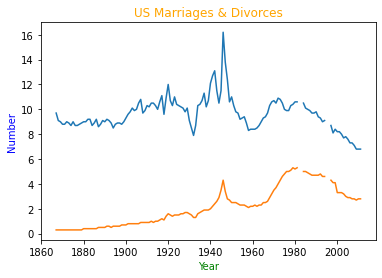

In [85]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import csv
#https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html

marriage = pd.read_csv('us-marriages-divorces-1867-2014.csv')
columns = marriage.columns.drop(['Marriages','Divorces','Population','Year'])
fig,ax= plt.subplots()
for column in columns:
    ax.plot(marriage['Year'],marriage[column])
ax.set_title('US Marriages & Divorces',color='orange')
ax.set_xlabel('Year',color='green')
ax.set_ylabel('Number',color='blue')
plt.show()

# Question 7

### Create a vertical bar chart comparing the number of marriages and divorces per capita in the U.S. between 1900, 1950, and 2000. Don't forget to label your axes!

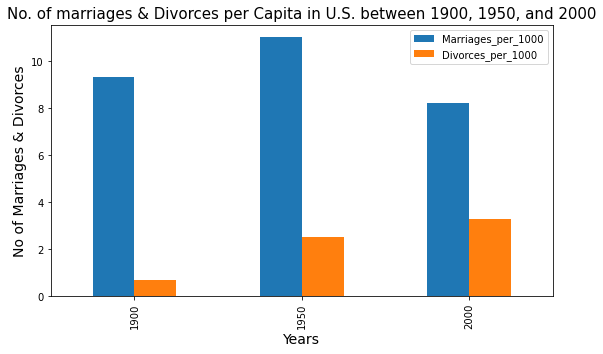

In [93]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.bar.html

data2 = marriage[(marriage.Year == 1900) | (marriage.Year == 1950) | (marriage.Year == 2000)]
data3 = data2.drop(columns = ['Marriages', 'Divorces', 'Population'])
data4 = data3.set_index('Year')
data4.plot.bar(figsize=(9,5))

plt.xlabel('Years', fontsize = 14)
plt.ylabel('No of Marriages & Divorces', fontsize = 14) 
plt.title("No. of marriages & Divorces per Capita in U.S. between 1900, 1950, and 2000", fontsize=15)
plt.legend() 
plt.show()

# Question 8

### Create a horizontal bar chart that compares the deadliest actors in Hollywood. Sort the actors by their kill count and label each bar with the corresponding actor's name. Don't forget to label your axes!

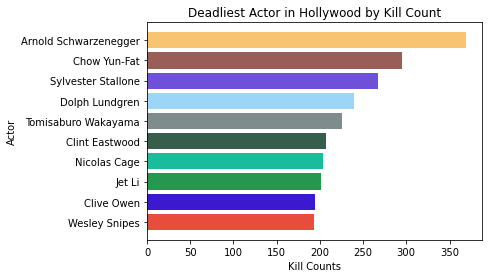

In [19]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import csv
counts = pd.read_csv('actor_kill_counts.csv')
counts.sort_values(by = 'Count', ascending = True, inplace = True)
y = list(counts['Actor'])
x = list(counts['Count'])
colours = ['#E74C3C','#3B19CE','#25974F','#1ABC9C','#375E4C','#7F8C8D','#9CD5F6','#6E50D9','#9A5E59','#F8C471']
#https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.barh.html
plt.barh(y,x,color=colours)
plt.xlabel('Kill Counts')
plt.ylabel('Actor')
plt.title('Deadliest Actor in Hollywood by Kill Count')
plt.show()

# Question 9

### Create a pie chart showing the fraction of all Roman Emperors that were assassinated. Make sure that the pie chart is an even circle, labels the categories, and shows the percentage breakdown of the categories.

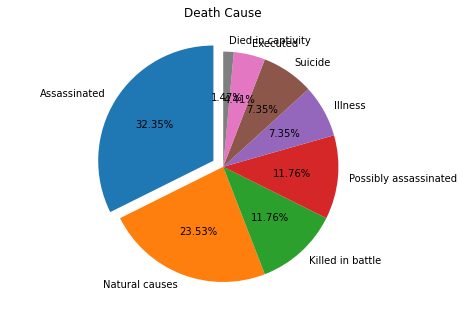

In [95]:
import pandas as pd
import matplotlib.pyplot as plt

roman_data = pd.read_csv('roman-emperor-reigns.csv')

data = roman_data.groupby(['Cause_of_Death']).Cause_of_Death.agg('count').to_frame('Count').reset_index()
data = data.sort_values(by='Count', ascending=False)
labels = data['Cause_of_Death'].unique()
#https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.pie.html

counts = roman_data['Cause_of_Death'].value_counts()
l = list(counts)
fig = plt.figure()
explode = (0.1,0,0,0,0,0,0,0)
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
plt.title('Death Cause')
ax.pie(l, labels = labels,explode = explode, autopct='%1.2f%%',startangle=90)
plt.show()

# Question 10

### Create a scatter plot showing the relationship between the total revenue earned by arcades and the number of Computer Science PhDs awarded in the U.S. between 2000 and 2009. Don't forget to label your axes! Color each dot according to its year.

Text(0, 0.5, 'Computer Science Doctorates Awarded (US)')

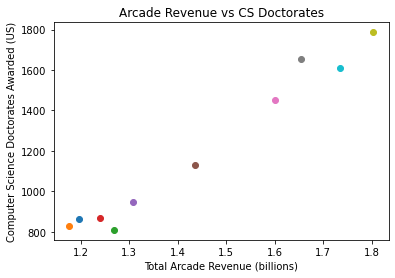

In [97]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt


arcade_vs_csphd = pd.read_csv('arcade-revenue-vs-cs-doctorates.csv')
#https://pandas.pydata.org/pandas-docs/version/0.25.0/reference/api/pandas.DataFrame.plot.scatter.html
fig4,ax4 = plt.subplots()
for i in range (len(arcade_vs_csphd['Total Arcade Revenue (billions)'])):
    ax4.scatter(arcade_vs_csphd['Total Arcade Revenue (billions)'][i],arcade_vs_csphd['Computer Science Doctorates Awarded (US)'][i])
ax4.set_title('Arcade Revenue vs CS Doctorates')
ax4.set_xlabel('Total Arcade Revenue (billions)')
ax4.set_ylabel('Computer Science Doctorates Awarded (US)')